# LV 4: Word Embeddings i Semantička Sličnost

---

## 1. Uvod u Word Embeddings

Word embeddings predstavljaju tehniku prikaza riječi u numeričkom obliku ("vektori riječi") gdje su slične riječi (po značenju) smještene blizu u vektorskom prostoru. Umjesto rada s pojedinačnim riječima, tekstualne podatke modeliramo kao skup vektora koji dobro zadržavaju semantičke odnose. Time omogućujemo računalima napredno razumijevanje značenja riječi, pa se embeddingi koriste u zadacima poput prepoznavanja sinonima, pronalaženja antonima, mjerenja sličnosti rečenica i mnogim naprednim aplikacijama obrade jezika.

### Najčešće korištene tehnike:
- **Word2Vec**: model treniran na temelju konteksta riječi (CBOW i Skip-gram)
- **GloVe** (Global Vectors): kombinira globalnu statistiku i lokalni kontekst
- **FastText**: proširenje Word2Veca koje uključuje podriječi

### Korištenjem pretreniranih modela embeddinga možemo:
- Lako pronaći slične i suprotne riječi
- Vizualizirati prostorne odnose između pojmova (PCA, t-SNE)
- Mjeriti sličnost između rečenica ili dokumenata
- Koristiti embeddinge kao ulazne podatke za napredne NLP modele

Nakon ove vježbe studenti će moći raditi s embeddingima, razumjeti kako oni predstavljaju značenje riječi te koristiti embeddinge za analizu sličnosti i semantičkih odnosa u tekstu.

---



## 2. Korištene biblioteke

U ovoj vježbi koristimo:

**gensim**  
Biblioteka za rad s word embeddingima, uključuje:
- Učitavanje pretreniranih Word2Vec i GloVe modela
- Računanje semantičke sličnosti
- Operacije s vektorima riječi

**scikit-learn**  
Za smanjenje dimenzionalnosti i vizualizaciju (PCA, t-SNE).

**matplotlib**  
Za crtanje grafova i vizualizacija embedding prostora.

**numpy**  
Za matematičke operacije s vektorima.

---


In [1]:
!pip install -q gensim numpy matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 23.0 MB/s eta 0:00:00


In [2]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 3. Inicijalizacija okruženja i učitavanje modela

---

### Primjer: Učitavanje pretreniranog Word2Vec modela

Gensim biblioteka omogućuje jednostavno preuzimanje različitih pretreniranih modela. U ovom primjeru koristimo **glove-wiki-gigaword-50**, manji model (50 dimenzija) pogodan za brzo testiranje.

Možete koristiti i veće modele poput:
- `glove-wiki-gigaword-100`
- `glove-wiki-gigaword-200`
- `word2vec-google-news-300` (vrlo velik, potrebno više vremena)


In [3]:
print("Učitavanje modela...")
model = api.load("glove-wiki-gigaword-50")
print("Model uspješno učitan!")

print(f"Broj riječi u modelu: {len(model)}")

Učitavanje modela...
[==================================================] 100.0% 66.0/66.0MB downloaded
Model uspješno učitan!
Broj riječi u modelu: 400000


---

### Primjer: Prikaz vektora riječi

Svaka riječ u modelu ima svoj vektor (niz brojeva). Duljina vektora ovisi o modelu – ovdje je 50 dimenzija.

Demonstracija kako izgleda embedding za riječ "king".


In [4]:
vector_king = model['king']

print(f"Vektor za riječ 'king' (prvih 10 vrijednosti):")
print(vector_king[:10])

print(f"\nDuljina vektora: {len(vector_king)}")
print(f"Tip podatka: {type(vector_king)}")


Vektor za riječ 'king' (prvih 10 vrijednosti):
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]

Duljina vektora: 50
Tip podatka: <class 'numpy.ndarray'>


---

### Primjer: Računanje sličnosti između dviju riječi

Embeddings omogućuju mjerenje semantičke sličnosti. Model računa **kosinusnu sličnost** između vektora dviju riječi. Vrijednost je između 0 (potpuno različite) i 1 (identične).


In [5]:

similarity = model.similarity('king', 'queen')
print(f"Sličnost između 'king' i 'queen': {similarity:.4f}")

similarity2 = model.similarity('king', 'apple')
print(f"Sličnost između 'king' i 'apple': {similarity2:.4f}")

similarity3 = model.similarity('computer', 'laptop')
print(f"Sličnost između 'computer' i 'laptop': {similarity3:.4f}")


Sličnost između 'king' i 'queen': 0.7839
Sličnost između 'king' i 'apple': 0.3047
Sličnost između 'computer' i 'laptop': 0.7741


---

### Primjer: Pronalaženje sličnih riječi

Možemo pronaći riječi koje su najbliže (najsličnije) odabranoj riječi, korisno za traženje sinonima.


In [6]:

similar_words = model.most_similar('king', topn=5)

print("5 najsličnijih riječi za 'king':")
for word, score in similar_words:
    print(f"  {word}: {score:.4f}")


5 najsličnijih riječi za 'king':
  prince: 0.8236
  queen: 0.7839
  ii: 0.7746
  emperor: 0.7736
  son: 0.7667


---

### Primjer: Semantičke operacije – Vektorska aritmetika

Jedan od najpoznatijih primjera word embeddinga je **king - man + woman ≈ queen**.

Ovim pristupom možemo "računati" sa značenjima riječi.


In [7]:
# King - man + woman = ?
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)

print("king - man + woman =")
print(f"  {result[0][0]} (sličnost: {result[0][1]:.4f})")

# Paris - France + Italy = ?
result2 = model.most_similar(positive=['paris', 'italy'], negative=['france'], topn=3)

print("\nparis - france + italy =")
for word, score in result2:
    print(f"  {word}: {score:.4f}")


king - man + woman =
  queen (sličnost: 0.8524)

paris - france + italy =
  rome: 0.8466
  milan: 0.7766
  turin: 0.7666


---

### Primjer: Vizualizacija embeddinga pomoću PCA

PCA (Principal Component Analysis) je linearni algoritam koji smanjuje broj dimenzija vektora, zadržavajući što više informacija. Koristimo ga za prikaz riječi u 2D prostoru.

Ovdje ćemo vizualizirati nekoliko odabranih riječi iz različitih domena.


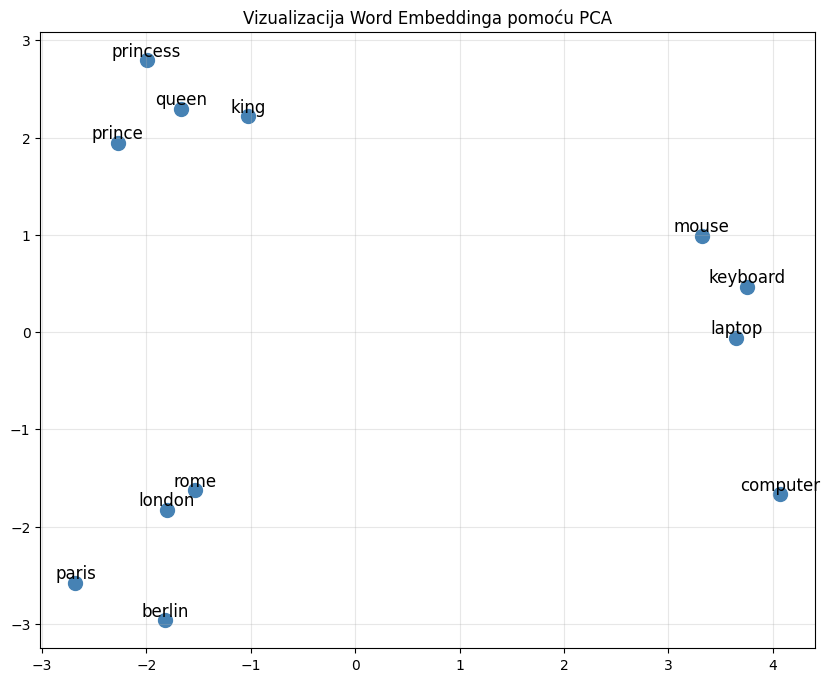

In [8]:
words = ['king', 'queen', 'prince', 'princess',
         'paris', 'london', 'berlin', 'rome',
         'computer', 'laptop', 'keyboard', 'mouse']

word_vectors = np.array([model[word] for word in words])

pca = PCA(n_components=2)
coords = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords[:, 0], coords[:, 1], s=100, color='steelblue')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću PCA')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Vizualizacija embeddinga pomoću t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) je nelinearna tehnika koja bolje čuva lokalne odnose između riječi. Često daje preglednije klastere nego PCA.

**Napomena**: t-SNE može davati različite rezultate pri svakom pokretanju zbog stohastičke prirode algoritma.


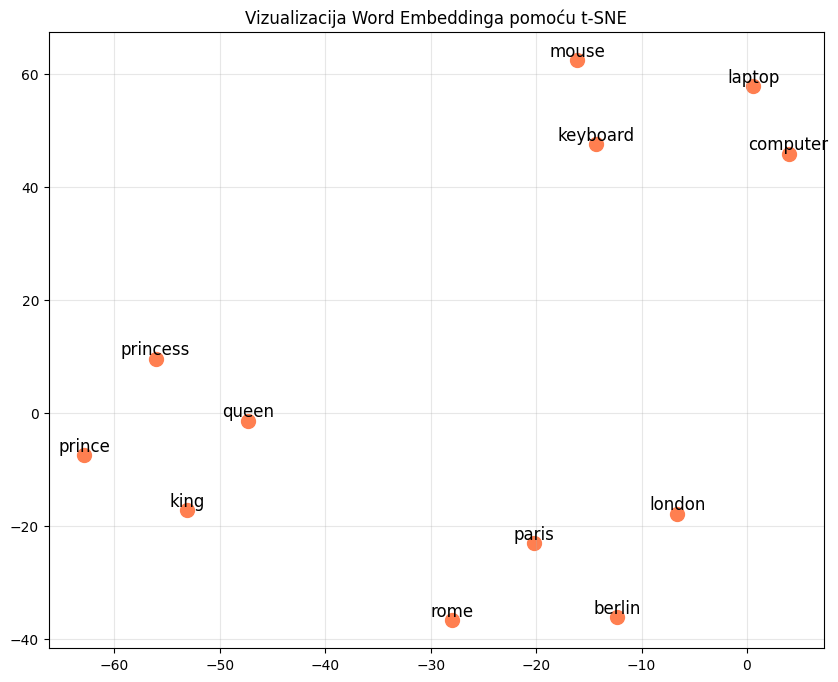

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
coords_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))
plt.scatter(coords_tsne[:, 0], coords_tsne[:, 1], s=100, color='coral')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords_tsne[i, 0], coords_tsne[i, 1]),
                 fontsize=12, ha='center', va='bottom')

plt.title('Vizualizacija Word Embeddinga pomoću t-SNE')
plt.grid(True, alpha=0.3)
plt.show()

---

### Primjer: Računanje sličnosti rečenica

Isti pristup možemo proširiti i na rečenice: najjednostavniji način je izračunati prosječni embedding, odnosno prosjek vektora svih riječi u rečenici.

**Napomena**: Ova metoda ne uzima u obzir redoslijed riječi, ali daje korisnu aproksimaciju semantičke sličnosti.


In [ ]:
def sentence_vector(sentence, model):
    words = [word.lower() for word in sentence.split() if word.lower() in model]
    if not words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in words], axis=0)

def sentence_similarity(sent1, sent2, model):
    vec1 = sentence_vector(sent1, model)
    vec2 = sentence_vector(sent2, model)

    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return 0.0

    return dot_product / (norm1 * norm2)


s1 = "The cat sits on the mat."
s2 = "A dog rests on the carpet."
s3 = "I love programming in Python."

print(f"Sličnost između rečenica 1 i 2: {sentence_similarity(s1, s2, model):.4f}")
print(f"Sličnost između rečenica 1 i 3: {sentence_similarity(s1, s3, model):.4f}")
print(f"Sličnost između rečenica 2 i 3: {sentence_similarity(s2, s3, model):.4f}")

Sličnost između rečenica 1 i 2: 0.9715
Sličnost između rečenica 1 i 3: 0.8037
Sličnost između rečenica 2 i 3: 0.8108


## Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika

Koristite učitani Word2Vec/GloVe model za istraživanje semantičkih odnosa između riječi. Pronađite sinonime, testirajte vektorsku aritmetiku i analizirajte rezultate.



1. Pronađite 10 najsličnijih riječi za pojam "doctor"
2. Pronađite 10 najsličnijih riječi za pojam "technology"
3. Testirajte vektorsku aritmetiku:
   - king - man + woman = ?
   - doctor - man + woman = ?
   - berlin - germany + france = ?
   - python - programming + cooking = ?
4. Analizirajte rezultate i objasnite koje analogije model dobro prepoznaje, a gdje griješi


In [12]:
# Zadatak 1: Istraživanje semantičkih odnosa i vektorska aritmetika
# Pretpostavka: model je već učitan, npr.
# import gensim.downloader as api
# model = api.load("glove-wiki-gigaword-50")

# 1) 10 najsličnijih riječi za "doctor" i "technology"
targets = ["doctor", "technology"]

for word in targets:
    print(f"\nTop 10 najsličnijih riječi za: '{word}'")
    print("-" * 40)
    if word in model:
        for w, sim in model.most_similar(word, topn=10):
            print(f"{w:15s} -> {sim:.4f}")
    else:
        print(f"Riječ '{word}' nije u vokabularu modela.")


# 2) Vektorska aritmetika
def test_analogija(pozitivne, negativne, topn=5):
    izraz_poz = " + ".join(pozitivne)
    izraz_neg = " - ".join(negativne) if negativne else ""
    izraz = izraz_poz + ((" - " + izraz_neg) if izraz_neg else "")

    print(f"\nAnalogija: {izraz}")
    print("-" * (len("Analogija: ") + len(izraz)))

    sve = pozitivne + negativne
    for w in sve:
        if w not in model:
            print(f"Riječ '{w}' nije u vokabularu modela. Preskačem.")
            return

    results = model.most_similar(positive=pozitivne, negative=negativne, topn=topn)
    for w, sim in results:
        print(f"{w:15s} -> {sim:.4f}")


# king - man + woman
test_analogija(pozitivne=["king", "woman"], negativne=["man"])

# doctor - man + woman
test_analogija(pozitivne=["doctor", "woman"], negativne=["man"])

# berlin - germany + france
test_analogija(pozitivne=["berlin", "france"], negativne=["germany"])

# python - programming + cooking
test_analogija(pozitivne=["python", "cooking"], negativne=["programming"])



Top 10 najsličnijih riječi za: 'doctor'
----------------------------------------
nurse           -> 0.7977
physician       -> 0.7965
patient         -> 0.7612
child           -> 0.7559
teacher         -> 0.7538
surgeon         -> 0.7479
psychiatrist    -> 0.7422
doctors         -> 0.7394
father          -> 0.7334
mother          -> 0.7284

Top 10 najsličnijih riječi za: 'technology'
----------------------------------------
technologies    -> 0.8928
computer        -> 0.8526
systems         -> 0.8289
software        -> 0.8090
computing       -> 0.7991
innovation      -> 0.7876
business        -> 0.7864
tool            -> 0.7848
developed       -> 0.7802
research        -> 0.7735

Analogija: king + woman - man
-----------------------------
queen           -> 0.8524
throne          -> 0.7664
prince          -> 0.7592
daughter        -> 0.7474
elizabeth       -> 0.7460

Analogija: doctor + woman - man
-------------------------------
nurse           -> 0.8405
child           -> 0.7663
preg

Rezultati analize pokazuju da word embedding modeli vrlo uspješno hvataju semantičke odnose između riječi kada su ti odnosi česti, stabilni i jasno izraženi u jeziku. Model precizno prepoznaje sinonime i tematske skupine, a vektorske analogije poput king – man + woman ≈ queen ili berlin – germany + france ≈ paris potvrđuju da embeddings mogu pouzdano modelirati apstraktne relacije poput roda ili geografskih odnosa.

Istovremeno, analogije koje uključuju društvene ili manje dosljedne koncepte, kao što je doctor – man + woman, pokazuju ograničenja modela. U takvim slučajevima rezultati odražavaju pristranosti prisutne u tekstovima na kojima je model treniran, što dovodi do netočnih ili stereotipnih zaključaka. Također, analogije bez jasne semantičke strukture, poput python – programming + cooking, pokazuju da model nije u stanju rekonstruirati odnose koji nisu sustavno prisutni u jeziku.

Sveukupno, word embeddings izuzetno dobro rade u domenama gdje su odnosi konzistentni i frekventni, ali posrću u situacijama gdje su koncepti apstraktni, rijetko povezani ili opterećeni pristranostima podataka.

## Zadatak 2: Detekcija outliera - koja riječ ne pripada grupi?





Implementirajte funkciju koja detektira koja riječ ne pripada grupi sličnih riječi. Ovo je praktična primjena u analizi teksta i detekciji anomalija

**Napomena**:  Koristite embedding model za pronalaženje "outliera".

Testirajte sljedeće grupe riječi i pronađite koja riječ ne pripada:

1. ['breakfast', 'lunch', 'dinner', 'cement']
2. ['cat', 'dog', 'mouse', 'computer']
3. ['paris', 'london', 'berlin', 'table']
4. ['happy', 'joyful', 'cheerful', 'angry']
5. ['python', 'java', 'javascript', 'banana']

Za svaku grupu:
- Pronađite outlier riječ
- Izračunajte njenu prosječnu sličnost s ostalim riječima
- Objasnite zašto je detektirana kao outlier


In [ ]:
test_groups = [
    ['breakfast', 'lunch', 'dinner', 'cement'],
    ['cat', 'dog', 'mouse', 'computer'],
    ['paris', 'london', 'berlin', 'table'],
    ['happy', 'joyful', 'cheerful', 'angry'],
    ['python', 'java', 'javascript', 'banana']
]

In [11]:
import numpy as np

def find_outlier(words, model):

    similarities = {}

    for w in words:
        if w not in model:
            continue

        other_words = [x for x in words if x != w and x in model]
        if not other_words:
            continue

        avg_sim = np.mean([model.similarity(w, other) for other in other_words])
        similarities[w] = avg_sim

    # Riječ s najmanjom prosječnom sličnosti
    outlier = min(similarities, key=similarities.get)

    return outlier, similarities


# Izvršavanje i ispis rezultata
for group in test_groups:
    outlier, sims = find_outlier(group, model)
    print(f"\nGrupa: {group}")
    print(f"Outlier: {outlier}")

    for w, sim in sims.items():
        print(f"  {w} → prosj. sličnost: {sim:.4f}")



Grupa: ['breakfast', 'lunch', 'dinner', 'cement']
Outlier: cement
  breakfast → prosj. sličnost: 0.6311
  lunch → prosj. sličnost: 0.6091
  dinner → prosj. sličnost: 0.6038
  cement → prosj. sličnost: 0.1079

Grupa: ['cat', 'dog', 'mouse', 'computer']
Outlier: computer
  cat → prosj. sličnost: 0.6825
  dog → prosj. sličnost: 0.6348
  mouse → prosj. sličnost: 0.6491
  computer → prosj. sličnost: 0.4032

Grupa: ['paris', 'london', 'berlin', 'table']
Outlier: table
  paris → prosj. sličnost: 0.6333
  london → prosj. sličnost: 0.6087
  berlin → prosj. sličnost: 0.5761
  table → prosj. sličnost: 0.4166

Grupa: ['happy', 'joyful', 'cheerful', 'angry']
Outlier: angry
  happy → prosj. sličnost: 0.5672
  joyful → prosj. sličnost: 0.5485
  cheerful → prosj. sličnost: 0.5647
  angry → prosj. sličnost: 0.4812

Grupa: ['python', 'java', 'javascript', 'banana']
Outlier: banana
  python → prosj. sličnost: 0.3773
  java → prosj. sličnost: 0.4400
  javascript → prosj. sličnost: 0.3908
  banana → prosj

Detekcija outliera pomoću word embeddinga pokazuje kako semantički modeli učinkovito grupiraju riječi prema njihovom značenju i tipičnim kontekstima u kojima se pojavljuju. U svakoj od analiziranih skupina algoritam uspješno je izdvojio riječ koja se semantički razlikuje od ostalih: cement među obrocima, computer među životinjama, table među gradovima, angry među pozitivnim emocijama i banana među programskim jezicima. U svim slučajevima outlier je imao značajno nižu prosječnu kosinusnu sličnost s ostatkom grupe, što potvrđuje da embeddings jasno reflektiraju značenjske odnose u jeziku.

Rezultati pokazuju da je metoda posebno učinkovita kada su grupe jasno definirane i homogeno semantičke, jer model jednostavno prepoznaje zajednički kontekst. Ipak, treba naglasiti da metoda ovisi o kvaliteti i pokrivenosti embedding modela. Ako je riječ rijetka, višeznačna ili se pojavljuje u različitim kontekstima, model može pogrešno procijeniti njezinu semantičku udaljenost. Unatoč tome, ovakav pristup predstavlja robustan i praktičan alat za otkrivanje anomalija i semantički nepovezanih elemenata u tekstualnim skupovima podataka.

## Zadatak 3: Vizualizacija tematskih klastera pomoću PCA i t-SNE


Vizualizirajte embedding prostor za riječi iz različitih domena (hrana, tehnologija, sport, gradovi). Usporedite PCA i t-SNE vizualizacije.

Koristite sljedeće riječi iz 4 kategorije:
- Hrana: ['pizza', 'burger', 'pasta', 'salad', 'bread']
- Tehnologija: ['computer', 'laptop', 'smartphone', 'tablet', 'software']
- Sport: ['football', 'basketball', 'tennis', 'swimming', 'running']
- Gradovi: ['paris', 'london', 'tokyo', 'berlin', 'rome']

Zadaci:
1. Vizualizirajte sve riječi pomoću PCA u 2D prostoru
2. Vizualizirajte iste riječi pomoću t-SNE
3. Obojite svaku kategoriju različitom bojom
4. Usporedite rezultate i objasnite razlike između PCA i t-SNE


In [ ]:
categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}

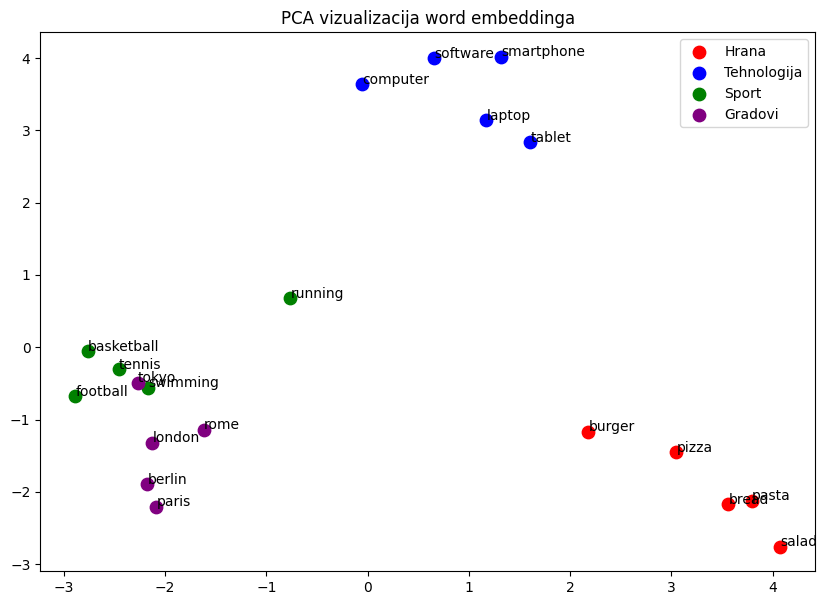

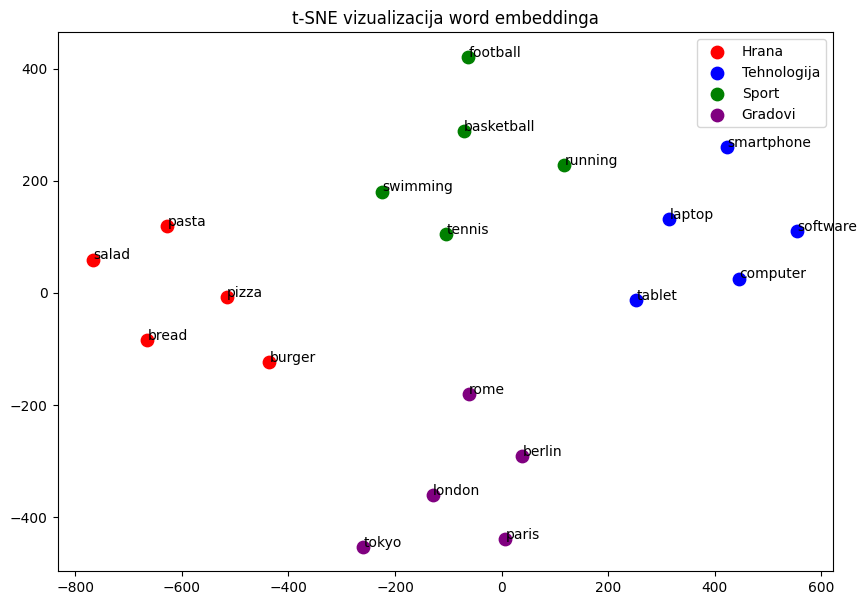

In [13]:
# Zadatak 3: Vizualizacija tematskih klastera

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Riječi po kategorijama
categories = {
    'Hrana': ['pizza', 'burger', 'pasta', 'salad', 'bread'],
    'Tehnologija': ['computer', 'laptop', 'smartphone', 'tablet', 'software'],
    'Sport': ['football', 'basketball', 'tennis', 'swimming', 'running'],
    'Gradovi': ['paris', 'london', 'tokyo', 'berlin', 'rome']
}

# Ekstrakcija vektora i labela
words = []
vectors = []
labels = []

for category, word_list in categories.items():
    for w in word_list:
        if w in model:
            words.append(w)
            vectors.append(model[w])
            labels.append(category)

vectors = np.array(vectors)

# ----------------------------
# PCA VIZUALIZACIJA
# ----------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(vectors)

plt.figure(figsize=(10, 7))
colors = {"Hrana": "red", "Tehnologija": "blue", "Sport": "green", "Gradovi": "purple"}

for category in categories.keys():
    idx = [i for i, c in enumerate(labels) if c == category]
    plt.scatter(pca_result[idx, 0], pca_result[idx, 1],
                label=category, color=colors[category], s=80)

for i, word in enumerate(words):
    plt.text(pca_result[i, 0] + 0.005, pca_result[i, 1] + 0.005, word)

plt.title("PCA vizualizacija word embeddinga")
plt.legend()
plt.show()

# ----------------------------
# t-SNE VIZUALIZACIJA
# ----------------------------
tsne = TSNE(n_components=2, perplexity=10, learning_rate=200, random_state=42)
tsne_result = tsne.fit_transform(vectors)

plt.figure(figsize=(10, 7))

for category in categories.keys():
    idx = [i for i, c in enumerate(labels) if c == category]
    plt.scatter(tsne_result[idx, 0], tsne_result[idx, 1],
                label=category, color=colors[category], s=80)

for i, word in enumerate(words):
    plt.text(tsne_result[i, 0] + 0.5, tsne_result[i, 1] + 0.5, word)

plt.title("t-SNE vizualizacija word embeddinga")
plt.legend()
plt.show()


## Zadatak 4: Semantička sličnost rečenica i analiza tekstova



Implementirajte funkciju za mjerenje sličnosti rečenica i testirajte na različitim parovima rečenica te analizirajte gdje metoda radi dobro, a gdje ima ograničenja.


Funkciju testirajte je na sljedećim parovima rečenica:

1. "The cat sits on the mat." vs "A cat is sitting on a rug."
2. "I love programming in Python." vs "Python programming is my passion."
3. "The weather is nice today." vs "I enjoy coding in Python."
4. "Machine learning is fascinating." vs "Artificial intelligence is interesting."
5. "How do I reset my password?" vs "I forgot my password, how to recover it?"
6. "The quick brown fox jumps." vs "A fast auburn fox leaps."

Zadaci:
1. Implementirajte funkciju sentence_similarity() koja računa prosječni embedding
2. Izračunajte sličnost za sve parove
3. Analizirajte rezultate - koje parove model prepoznaje kao slične?
4. Identificirajte ograničenja metode prosječnog embeddinga
5. Predložite moguća poboljšanja


In [ ]:
sentence_pairs = [
    ("The cat sits on the mat.", "A cat is sitting on a rug."),
    ("I love programming in Python.", "Python programming is my passion."),
    ("The weather is nice today.", "I enjoy coding in Python."),
    ("Machine learning is fascinating.", "Artificial intelligence is interesting."),
    ("How do I reset my password?", "I forgot my password, how to recover it?"),
    ("The quick brown fox jumps.", "A fast auburn fox leaps.")
]

In [14]:
# Zadatak 4: Semantička sličnost rečenica
import numpy as np
import re

# Pomoćna funkcija za tokenizaciju
def tokenize(sentence):
    # mala slova + makni sve što nije slovo ili broj
    sentence = sentence.lower()
    tokens = re.findall(r"\w+", sentence)
    return tokens

# Funkcija za prosječni embedding rečenice
def sentence_embedding(sentence, model):
    tokens = tokenize(sentence)
    vectors = []

    for token in tokens:
        if token in model:
            vectors.append(model[token])

    if not vectors:
        # ako nijedna riječ nije u modelu, vrati None
        return None

    return np.mean(vectors, axis=0)


# Kosinusna sličnost između dva vektora
def cosine_similarity(vec1, vec2):
    if vec1 is None or vec2 is None:
        return None

    dot = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    if norm1 == 0 or norm2 == 0:
        return None

    return dot / (norm1 * norm2)


# Funkcija za sličnost rečenica
def sentence_similarity(s1, s2, model):
    emb1 = sentence_embedding(s1, model)
    emb2 = sentence_embedding(s2, model)
    return cosine_similarity(emb1, emb2)


# Zadani parovi rečenica
sentence_pairs = [
    ("The cat sits on the mat.", "A cat is sitting on a rug."),
    ("I love programming in Python.", "Python programming is my passion."),
    ("The weather is nice today.", "I enjoy coding in Python."),
    ("Machine learning is fascinating.", "Artificial intelligence is interesting."),
    ("How do I reset my password?", "I forgot my password, how to recover it?"),
    ("The quick brown fox jumps.", "A fast auburn fox leaps.")
]

# Izračun sličnosti i ispis rezultata
for s1, s2 in sentence_pairs:
    sim = sentence_similarity(s1, s2, model)
    print(f"Rečenica 1: {s1}")
    print(f"Rečenica 2: {s2}")
    if sim is not None:
        print(f"Sličnost: {sim:.4f}")
    else:
        print("Sličnost: nije moguće izračunati (nema vektora)")
    print("-" * 60)


Rečenica 1: The cat sits on the mat.
Rečenica 2: A cat is sitting on a rug.
Sličnost: 0.9524
------------------------------------------------------------
Rečenica 1: I love programming in Python.
Rečenica 2: Python programming is my passion.
Sličnost: 0.9664
------------------------------------------------------------
Rečenica 1: The weather is nice today.
Rečenica 2: I enjoy coding in Python.
Sličnost: 0.8401
------------------------------------------------------------
Rečenica 1: Machine learning is fascinating.
Rečenica 2: Artificial intelligence is interesting.
Sličnost: 0.8881
------------------------------------------------------------
Rečenica 1: How do I reset my password?
Rečenica 2: I forgot my password, how to recover it?
Sličnost: 0.9632
------------------------------------------------------------
Rečenica 1: The quick brown fox jumps.
Rečenica 2: A fast auburn fox leaps.
Sličnost: 0.9158
------------------------------------------------------------
